In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [248]:
df = pd.read_csv('res/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [249]:
df.isna().sum(axis = 0 )/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [250]:
df = df.drop(['Cabin'], axis = 1)

In [251]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [252]:
vars_disc = ['Survived', 'Pclass', 'Sex',  'SibSp', 'Parch',  'Embarked']
vars_cat =['Pclass', 'Sex','Embarked']
for i in vars_disc:
    print(df[i].value_counts())
    print('\n')



0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


S    644
C    168
Q     77
Name: Embarked, dtype: int64




In [253]:
def edad(x):
    global limt_sup
    global lim_inf
    
    if x > lim_sup or x < lim_inf:
        return None
    else:
        return x

# outlier
vars_num = ['Fare', 'Age']
for i in vars_num:
    describe = df[i].describe()
    Q1 = describe['25%']
    Q3 = describe['75%']
    RI = Q3 - Q1
    lim_inf = Q1 - 1.5*RI
    lim_sup = Q3 + 1.5*RI
    
    df[i] = df[i].apply(lambda x: edad(x))
    df = df.dropna(axis=0, subset=[i])
        

In [254]:
df.isna().sum(axis = 0 )


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [255]:
for i in vars_cat:
    categorias = df[i].value_counts().index
    
    for k in categorias:
        name ='is-' + str(i) + '-'+str(k)
        df[name] = np.where(df[i] == k,1 ,0 )
        
    df = df.drop([i],axis=1)
           

In [256]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'is-Pclass-3', 'is-Pclass-2', 'is-Pclass-1', 'is-Sex-male',
       'is-Sex-female', 'is-Embarked-S', 'is-Embarked-C', 'is-Embarked-Q'],
      dtype='object')

In [257]:
df['family_size'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)

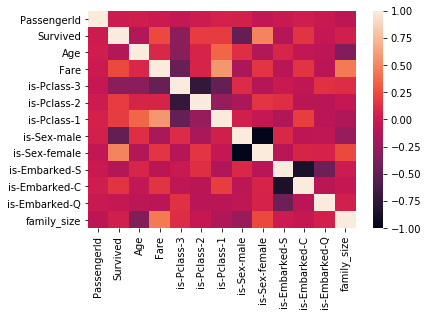

In [258]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, vmin=-1, vmax=1)

In [259]:
df = df.drop(['is-Pclass-3', 'is-Sex-male', 'is-Embarked-C'], axis=1)

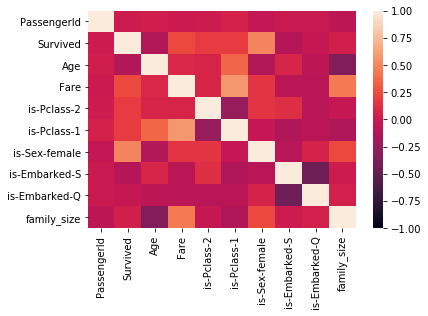

In [260]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, vmin=-1, vmax=1)

In [261]:
y = df['Survived']
x = df.drop(['Survived','Ticket','PassengerId', 'Name'], axis=1)
x.columns

Index(['Age', 'Fare', 'is-Pclass-2', 'is-Pclass-1', 'is-Sex-female',
       'is-Embarked-S', 'is-Embarked-Q', 'family_size'],
      dtype='object')

In [262]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.15, random_state=1)


In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [264]:
clf = [
    (LogisticRegression(), 're-log'),
    (DecisionTreeClassifier(), '-arbol-class')]

In [265]:
df.isna().sum(axis = 0 )/len(df)

PassengerId      0.0
Survived         0.0
Name             0.0
Age              0.0
Ticket           0.0
Fare             0.0
is-Pclass-2      0.0
is-Pclass-1      0.0
is-Sex-female    0.0
is-Embarked-S    0.0
is-Embarked-Q    0.0
family_size      0.0
dtype: float64

In [270]:
import joblib
from sklearn.metrics import accuracy_score
for model, name in clf:
    # Entrenar
    model.fit(x_train, y_train)
    print(f'Entrenando model {name}')
    
    # Medir
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'modelo{name}, con un accuracy: {round(accuracy*100, 2)}')
    # Guardar
    job_file = 'modelo-'+ name+'.pkl'
    joblib.dump(model, f'res/titanic/{job_file}')
    

Entrenando model re-log
modelore-log, con un accuracy: 80.22
Entrenando model -arbol-class
modelo-arbol-class, con un accuracy: 74.73
